<a href="https://colab.research.google.com/github/Nathan-Topping/data-analysis-with-python/blob/main/Week_10/Workshop_Week_10_Flawed_Data_Analysis.ipynb" target="_blank">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Fix My Analysis: Quarterly Sales Report

You are a Data Analyst at an e-commerce company. The previous analyst created this report, but there are several errors that need to be fixed before it can be sent to management.

**Your Goal:** Work through the notebook, identify and fix the errors, and document your changes.

## Step 1: Load the Data

In [33]:
iyrfmhtd,kub/lo;j/;oyhk

SyntaxError: invalid syntax (ipython-input-1691501151.py, line 1)

In [18]:
import pandas as pd

# Load the datasets
customers = pd.read_csv("customers.csv")
products = pd.read_csv("products.csv")
orders = pd.read_csv("orders.csv")

print("Datasets loaded!")
orders.head()

Datasets loaded!


,order_id,customer_id,product_id,quantity,order_date
0,ORD0001,CUST025,PROD033,4,06/01/22
1,ORD0002,CUST105,PROD029,1,11/26/23
2,ORD0003,CUST193,PROD037,1,06/19/23
3,ORD0004,CUST118,PROD037,2,08/22/22
4,ORD0005,CUST091,PROD044,1,10/30/22


## Step 2: Combine the Datasets

The first step is to combine these datasets into a single DataFrame for analysis.

In [19]:
# Combine orders with customer and product data
merged_data = orders.merge(customers, on="customer_id", how="inner")
merged_data = merged_data.merge(products, on="product_id", how="inner")

print("Data merged!")
merged_data.info()

Data merged!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          475 non-null    object 
 1   customer_id       475 non-null    object 
 2   product_id        475 non-null    object 
 3   quantity          475 non-null    int64  
 4   order_date        475 non-null    object 
 5   first_name        475 non-null    object 
 6   last_name         475 non-null    object 
 7   email             475 non-null    object 
 8   customer_segment  475 non-null    object 
 9   region            475 non-null    object 
 10  product_name      475 non-null    object 
 11  category          475 non-null    object 
 12  unit_cost         475 non-null    float64
dtypes: float64(1), int64(1), object(11)
memory usage: 48.4+ KB


### **Task 1: Check the Join Strategy**

**Context:** The previous analyst used `inner` joins. Is this the best approach? An `inner` join will only keep records that exist in *both* datasets.

**Investigation:** Check if we lost any order records after the joins. The original `orders` DataFrame has 500 rows. Does `merged_data` also have 500 rows?

**Hint:** Think about what happens if an order has a `customer_id` or `product_id` that doesn't exist in the other tables. Should we use a `left` join instead to keep all orders?

In [20]:
# Your code here to investigate the number of rows

## Step 3: Data Cleaning

Now let's clean the data. We'll calculate the total price for each order and convert the date column.

In [21]:
# Calculate total price - FLAWED CALCULATION
merged_data["total_price"] = merged_data["quantity"] + merged_data["unit_cost"]

# Convert order_date to datetime
merged_data["order_date"] = pd.to_datetime(merged_data["order_date"])

print("Data cleaned!")
merged_data.describe()

Data cleaned!


/tmp/ipython-input-1833414723.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data["order_date"] = pd.to_datetime(merged_data["order_date"])


,quantity,order_date,unit_cost,total_price
count,475.000000,475,475.000000,475.000000
mean,2.410526,2022-12-22 21:49:38.526315776,252.258126,254.668653
min,-10.000000,2022-01-02 00:00:00,0.000000,1.000000
25%,1.000000,2022-07-01 00:00:00,189.900000,191.860000
50%,2.000000,2022-12-20 00:00:00,255.760000,259.760000
75%,3.000000,2023-06-27 12:00:00,352.840000,356.340000
max,4.000000,2023-12-30 00:00:00,470.860000,474.860000
std,1.255324,NaN,121.277955,121.306287


### **Task 2: Fix the Total Price Calculation and Check for Issues**

**Context:** Look at the code above that calculates `total_price` and correct it if necessary

**Investigation:**
1.  Identify the error in the `total_price` calculation and fix it.
2.  Look at the `describe()` output. The `min` value for `quantity` is negative. Find and examine orders with invalid quantities (negative or zero values).
3.  Check for orders with invalid `unit_cost` values (zero or negative).
4.  Remove all orders with invalid data (negative/zero quantity or negative/zero unit cost).
5.  Recalculate the `total_price` with the corrected formula after removing invalid data.



In [22]:
# Your code here to fix the calculation and remove invalid data

### **Task 3: Check for Missing Data**

**Context:** Missing data can cause problems in analysis. We should check how much missing data we have across all columns.

**Investigation:**
1.  Count the number of missing values (NaN) in each column of the dataset.
2.  Calculate the percentage of missing values for each column.
3.  Identify which columns have missing data.
4.  Decide how to handle the missing data. (You have been told missing customer information is acceptable, but orders with missing product information should be removed)

**Hint:** Use `.isnull().sum()` to count missing values per column.

In [23]:
# Your code here to check for and handle missing data

## Step 4: Aggregate the Data

Let's create a summary of sales by product category.

In [24]:
# Aggregate sales by category
category_summary = merged_data.groupby("category").agg({
    "total_price": "mean",
    "order_id": "count"
}).reset_index()

category_summary.columns = ["Category", "Average Sale Value", "Number of Orders"]

print("Sales Summary by Category:")
category_summary

Sales Summary by Category:


,Category,Average Sale Value,Number of Orders
0,Books,238.274486,107
1,Clothing,311.978981,157
2,Electronics,243.709710,69
3,Home Goods,208.982887,142


### **Task 4: Check the Aggregation Logic**

**Context:** The summary above shows the *average* sale value. Is this the best metric for a sales report? Management usually wants to see the *total* sales.

**Investigation:** Change the aggregation function to get the total sales per category. Does this give a better picture of performance? Also, sort the results by total sales in descending order.

In [25]:
# Your code here to fix the aggregation

## Step 5: Visualise the Results

Let's visualise the category summary with a bar chart.

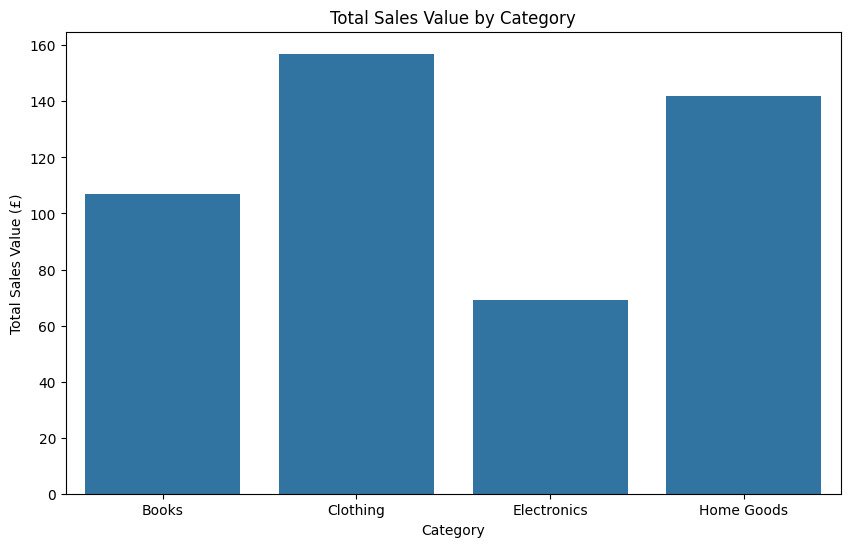

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=category_summary, x="Category", y="Number of Orders")
plt.title("Total Sales Value by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales Value (£)")
plt.show()

### **Task 5: Fix the Visualisation**

**Context:** Look carefully at the chart above. The title says "Total Sales Value by Category" but what is actually being plotted? Check the code to see what data is being visualised.

**Investigation:**
1.  Identify what's wrong with the visualisation (hint: look at the `y` parameter).
2.  Create a corrected bar chart using your fixed summary table from Task 4 (with total sales, not average).
3.  Make sure the chart plots the correct metric and has accurate labels.
4.  Sort the bars by sales value to make it easier to read.

**Hint:** The y-axis should show total sales value, not number of orders!

In [27]:
# Your code here to create a corrected visualisation

## Step 6: Geographical Sales Analysis

Now let's analyse sales by customer region.

In [28]:
# Geographical Sales Analysis - FLAWED: using wrong aggregation
region_summary = merged_data.groupby("region").agg({
    "total_price": "mean",
    "customer_id": "count"
}).reset_index()

region_summary.columns = ["Region", "Average Sale Value", "Number of Customers"]

print("Sales Summary by Region:")
region_summary

Sales Summary by Region:


,Region,Average Sale Value,Number of Customers
0,East,260.586273,110
1,North,256.966702,188
2,South,252.600513,117
3,West,240.652000,60


### **Task 6: Fix the Regional Analysis**

**Context:** The regional analysis has similar problems to the category analysis. We want to see total sales by region, not average sales.

**Investigation:**
1.  Change the aggregation
2.  The column name says "Number of Customers" but we're counting `customer_id` which might count the same customer multiple times. Change it to provide the "Number of Orders".
3.  Sort the results by total sales in descending order.
4.  Create a bar chart showing total sales by region (sorted by sales value).

**Hint:** Use the same approach you used to fix the category analysis!

In [29]:
# Your code here to fix the regional analysis

## Step 7: Monthly Sales Trend Analysis

Let's look at how the value of sales have changed over time.

In [30]:
# Monthly Sales Trend Analysis
merged_data["order_month"] = merged_data["order_date"].dt.to_period("M")
monthly_summary = merged_data.groupby("order_month").agg({
    "order_id": "count"
}).reset_index()

monthly_summary.columns = ["Month", "Total Sales"]
monthly_summary["Month"] = monthly_summary["Month"].dt.to_timestamp()

print("Monthly Sales Summary:")
monthly_summary.head()

Monthly Sales Summary:


,Month,Total Sales
0,2022-01-01,26
1,2022-02-01,20
2,2022-03-01,27
3,2022-04-01,13
4,2022-05-01,13


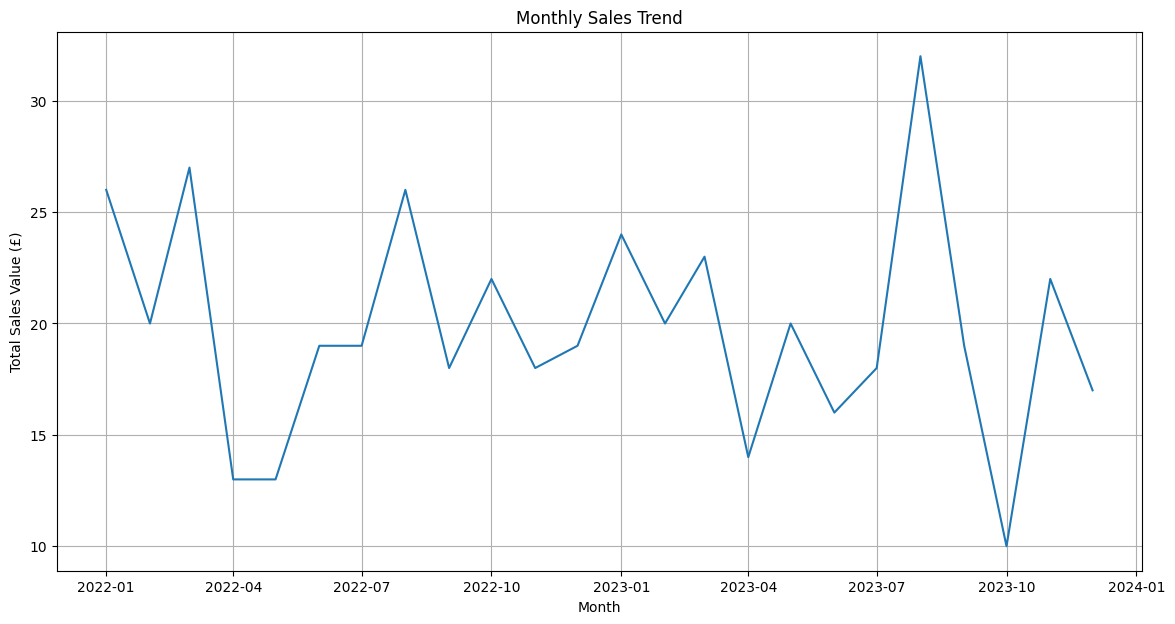

In [31]:
# Visualisation
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_summary, x="Month", y="Total Sales")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales Value (£)")
plt.grid(True)
plt.show()

### **Task 7: Fix the Time-Series Analysis**

**Context:** The monthly trend analysis has a critical error. Look at the aggregation code - what metric is actually being calculated?

**Investigation:**
1.  Identify what's wrong with the monthly aggregation (hint: we're counting orders, not summing sales).
2.  Fix the aggregation to calculate the sum of `total_price` for each month.
3.  Update the column name to accurately reflect what's being measured.
4.  Recreate the line chart with the corrected data.

**Hint:** The chart should show total sales revenue per month, not the number of orders!

In [32]:
# Your code here to fix the time-series analysis

## Step 8: Final Summary & Documentation

### **Task 8: Document Your Fixes**

Now that you have fixed the analysis, the final step is to document your work. In a real-world scenario, you would update the `README.md` file in your repository.

**For this exercise, write a brief summary in the markdown cell below explaining:**
1.  What problems you found in the original analysis.
2.  How you fixed each problem.
3.  What the impact of your fixes was on the final results.
4.  What insights you gained from the corrected geographical and time-series analyses.

*Your summary here...*